In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/fancyshmancy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Assignment 1

In [2]:
# choose to use March 2015 data
df=pd.read_csv('201503-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [3]:
# create age data frames by gender
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

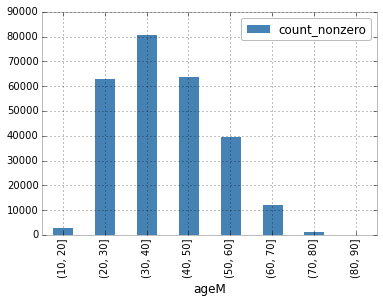

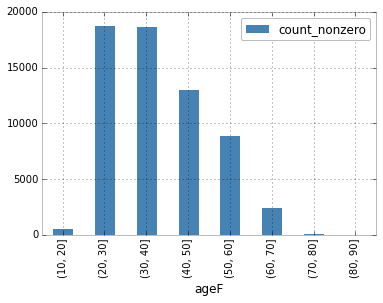

In [4]:
bins = np.arange(10, 99, 10)
disM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero])
disM.plot(kind='bar')
disF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero])
disF.plot(kind='bar')

In [5]:
# convert start time to time stamps for the sake of convenience
df['date'] = pd.to_datetime(df['starttime'])

In [6]:
# create age data frames by time of usage
# use 7 am and 7 pm as thresholds to determine day and night
# http://www.timeanddate.com/sun/usa/new-york?month=3&year=2015
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour>=7) & (df['date'].dt.hour<19)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['date'].dt.hour<7) | (df['date'].dt.hour>=19))]

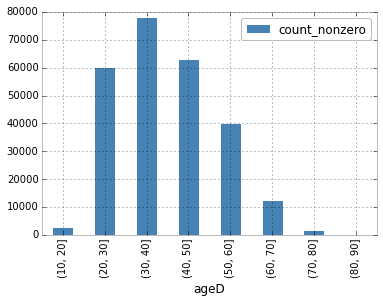

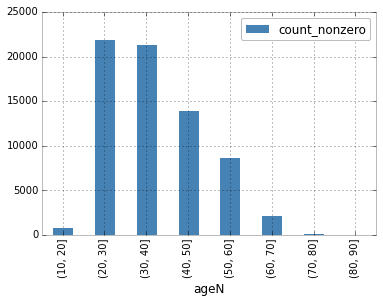

In [7]:
bins = np.arange(10, 99, 10)
disD = df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero])
disD.plot(kind='bar')
disN = df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero])
disN.plot(kind='bar')

In [8]:
from scipy import stats
corrMF = stats.pearsonr(disM,disF)[0]
print('Pearson correlation of usage by gender = {0}'.format(corrMF))
corrDN = stats.pearsonr(disD,disN)[0]
print('Pearson correlation of usage by time = {0}'.format(corrDN))

Pearson correlation of usage by gender = [ 0.97896156]
Pearson correlation of usage by time = [ 0.96207895]


From Pearson's test, all the correlation coefficients are extremely high for gender and time. It means that there doesn't exist any obvious bias in the usage by gender or by time among different age groups.

In [9]:
print "Spearman correlation of usage by gender = ", stats.spearmanr(disM,disF)
print "Spearman correlation of usage by time = ", stats.spearmanr(disD,disN)

Spearman correlation of usage by gender =  (0.92857142857142849, 0.00086296818289998561)
Spearman correlation of usage by time =  (0.92857142857142849, 0.00086296818289998561)


From Spearman's test, usage by male and female is highly correlated, and the same holds for usage during day and night. It implies that there doesn't exist any obvious bias in the usage by gender or by time among different age groups. It also makes sense that the Spearman method is more accurate in dealing with large-scale data.

KS between male and female:  0.0010147287736


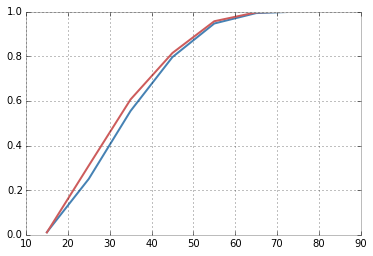

In [10]:
csM = disM.cumsum()
csF = disF.cumsum()
pl.plot(bins[:-1]+5,csM/csM.max())
pl.plot(bins[:-1]+5,csF/csF.max())
KSMF = np.nanmax(np.array(csM/csM.max())-np.array(csF/csF.max()))
print "KS between male and female: ", KSMF

KS between day and night:  2.50970485383e-05


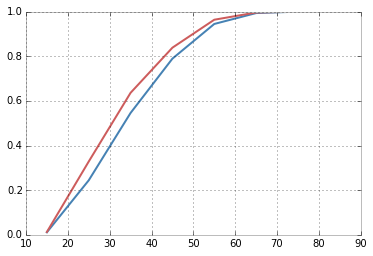

In [11]:
csD = disD.cumsum()
csN = disN.cumsum()
pl.plot(bins[:-1]+5,csD/csD.max())
pl.plot(bins[:-1]+5,csN/csN.max())
KSDN = np.nanmax(np.array(csD/csD.max())-np.array(csN/csN.max()))
print "KS between day and night: ", KSDN

In [12]:
ksG = stats.ks_2samp(df.ageM[~np.isnan(df.ageM)],df.ageF[~np.isnan(df.ageF)])
print "KS by gender: ", ksG
ksT = stats.ks_2samp(df.ageD[~np.isnan(df.ageD)],df.ageN[~np.isnan(df.ageN)])
print "KS by time: ", ksT

KS by gender:  (0.064970769084207902, 1.8390797598623948e-187)
KS by time:  (0.103347200416262, 0.0)


Yes, they are likely to come from the same parent distribution, because their distribution patterns are similar.